In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

In [2]:
X, y, coefs = make_regression(n_samples=100, n_features=20, noise=10, random_state=42, coef=True)

In [3]:
coefs

array([ 6.60098441, 94.7688026 , 40.71064891,  0.        ,  0.        ,
        0.        , 11.09980988, 95.51152073, 80.823521  , 34.8820534 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       29.9565678 ,  7.23164753,  0.        ,  0.        , 52.25765993])

In [4]:
X = pd.DataFrame(X, columns=['x'+str(i) for i in range(20)])

print(X.agg(['mean','std']))

            x0        x1        x2        x3        x4        x5        x6  \
mean  0.066483 -0.090669  0.148793 -0.009252  0.066883  0.138678 -0.020263   
std   1.029991  0.977525  0.933608  0.895542  0.927696  0.923655  0.978568   

            x7        x8        x9       x10       x11       x12       x13  \
mean  0.135566  0.048246  0.021527 -0.067366  0.116212  0.181512 -0.021257   
std   0.946059  0.904497  1.078934  0.849485  1.024664  1.045479  1.053048   

           x14       x15       x16       x17       x18       x19  
mean  0.140830  0.164645 -0.083936  0.011392 -0.013781 -0.032560  
std   0.921654  1.088579  1.063061  1.186164  1.007022  0.885011  


In [5]:
y = pd.DataFrame(y)
y.agg(['mean','std'])

0
mean   17.163369
std   170.584475

In [6]:
y = y[0]

In [7]:
reg = LinearRegression().fit(X, y)
print('R2', reg.score(X, y))
print('coef', [str(round(reg.coef_[i], 3)) for i in range(5)])
print('coef', [str(round(reg.coef_[i], 3)) for i in range(5,10)])
print('coef', [str(round(reg.coef_[i], 3)) for i in range(10,15)])
print('coef', [str(round(reg.coef_[i], 3)) for i in range(15,20)])
print('bias', reg.intercept_)

R2 0.9972636382184018
coef ['5.819', '93.617', '40.451', '-0.137', '0.933']
coef ['-1.553', '12.999', '95.577', '81.02', '35.276']
coef ['1.624', '1.097', '0.976', '1.027', '-0.612']
coef ['27.966', '7.652', '0.969', '-0.193', '54.462']
bias -0.25433951244353636


In [8]:
from sklearn.tree import DecisionTreeRegressor

In [172]:
tree = DecisionTreeRegressor(random_state=0).fit(X, y)
print('R2', tree.score(X, y))

R2 1.0


In [174]:
from sklearn.ensemble import RandomForestRegressor

In [175]:
RF = RandomForestRegressor(random_state=0).fit(X, y)
print('R2', RF.score(X, y))

R2 0.9478243640210839


In [10]:
# https://habr.com/ru/articles/681218/

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1440.
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           1.06e-92
Time:                        12:07:11   Log-Likelihood:                -360.26
No. Observations:                 100   AIC:                             762.5
Df Residuals:                      79   BIC:                             817.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2543      1.097     -0.232      0.8

In [11]:
reg.coef_

array([ 5.81934467, 93.61694029, 40.45112528, -0.13695439,  0.93294567,
       -1.55281734, 12.99925102, 95.57667958, 81.02048367, 35.27571684,
        1.6242894 ,  1.09659676,  0.97612578,  1.02690177, -0.61154004,
       27.9660991 ,  7.65180357,  0.96870548, -0.19339141, 54.46237526])

In [12]:
tree.feature_importances_

array([1.33572605e-02, 4.12130682e-01, 4.88824923e-02, 1.25461093e-02,
       1.29745013e-06, 1.25672717e-03, 1.02251567e-02, 1.70819144e-01,
       2.02579164e-01, 2.48536009e-03, 2.30307890e-02, 1.26211776e-02,
       5.49833323e-03, 0.00000000e+00, 4.00800706e-04, 2.70278405e-02,
       1.37909471e-03, 1.43897197e-02, 7.13644811e-03, 3.42324033e-02])

In [13]:
df_imp = pd.DataFrame(tree.feature_importances_, index=X.columns, columns=['tree_imp']) 

In [14]:
df_imp['coefs'] = reg.coef_

In [15]:
df_imp.loc[['x3','x4','x5','x10','x11','x12','x13','x14','x17','x18'],'coefs'] = 0

In [16]:
len(['x3','x4','x5','x10','x11','x12','x13','x14','x17','x18'])

10

In [17]:
df_imp = df_imp.sort_values('coefs', ascending=False)

In [18]:
df_imp.reset_index(inplace=True)
df_imp['coef_rank'] = df_imp.index

In [19]:
df_imp = df_imp.sort_values('tree_imp', ascending=False).reset_index(drop=True)

In [20]:
df_imp = df_imp.sort_values('tree_imp', ascending=False).reset_index()

In [21]:
df_imp['tree_rank'] = df_imp['level_0']
del df_imp['level_0']

In [22]:
df_imp['coef_rank'].replace({11:10,12:10,13:10,14:10,15:10,16:10,17:10,18:10,19:10}, inplace=True)

In [23]:
from sklearn.metrics import ndcg_score

In [24]:
ndcg_score(df_imp['coef_rank'].values.reshape(1,-1), df_imp['tree_rank'].values.reshape(1,-1))

0.9848864142688846

In [25]:
ndcg_score(df_imp['coef_rank'].values.reshape(1,-1), df_imp['coef_rank'].values.reshape(1,-1))

0.9999999999999999

In [26]:
ndcg_score(df_imp['coef_rank'].values.reshape(1,-1), df_imp['coef_rank'].values.reshape(1,-1))

0.9999999999999999

In [27]:
df_imp['t1'] = df_imp['tree_rank']
df_imp.loc[1,'t1'] = df_imp.loc[0,'tree_rank']
df_imp.loc[0,'t1'] = df_imp.loc[1,'tree_rank']

In [28]:
df_imp

index  tree_imp      coefs  coef_rank  tree_rank  t1
0     x1  0.412131  93.616940          1          0   1
1     x8  0.202579  81.020484          2          1   0
2     x7  0.170819  95.576680          0          2   2
3     x2  0.048882  40.451125          4          3   3
4    x19  0.034232  54.462375          3          4   4
5    x15  0.027028  27.966099          6          5   5
6    x10  0.023031   0.000000         10          6   6
7    x17  0.014390   0.000000         10          7   7
8     x0  0.013357   5.819345          9          8   8
9    x11  0.012621   0.000000         10          9   9
10    x3  0.012546   0.000000         10         10  10
11    x6  0.010225  12.999251          7         11  11
12   x18  0.007136   0.000000         10         12  12
13   x12  0.005498   0.000000         10         13  13
14    x9  0.002485  35.275717          5         14  14
15   x16  0.001379   7.651804          8         15  15
16    x5  0.001257   0.000000         10         16  16
17   x14  0.000401   0.000000         10         17  17
18    x4  0.000001   0.000000         10         18  18
19   x13  0.000000   0.000000         10         19  19

In [29]:
ndcg_score(df_imp['tree_rank'].values.reshape(1,-1), df_imp['t1'].values.reshape(1,-1))

0.9999550849552533

In [30]:
df_imp['t1'] = df_imp['tree_rank']
df_imp.loc[0,'t1'] = df_imp.loc[19,'tree_rank']
df_imp.loc[19,'t1'] = df_imp.loc[0,'tree_rank']

In [32]:
ndcg_score(df_imp['tree_rank'].values.reshape(1,-1), df_imp['t1'].values.reshape(1,-1))

0.822248759918777

In [34]:
df_imp.sort_values('index')

index  tree_imp      coefs  coef_rank  tree_rank  t1
8     x0  0.013357   5.819345          9          8   8
0     x1  0.412131  93.616940          1          0  19
6    x10  0.023031   0.000000         10          6   6
9    x11  0.012621   0.000000         10          9   9
13   x12  0.005498   0.000000         10         13  13
19   x13  0.000000   0.000000         10         19   0
17   x14  0.000401   0.000000         10         17  17
5    x15  0.027028  27.966099          6          5   5
15   x16  0.001379   7.651804          8         15  15
7    x17  0.014390   0.000000         10          7   7
12   x18  0.007136   0.000000         10         12  12
4    x19  0.034232  54.462375          3          4   4
3     x2  0.048882  40.451125          4          3   3
10    x3  0.012546   0.000000         10         10  10
18    x4  0.000001   0.000000         10         18  18
16    x5  0.001257   0.000000         10         16  16
11    x6  0.010225  12.999251          7         11  11
2     x7  0.170819  95.576680          0          2   2
1     x8  0.202579  81.020484          2          1   1
14    x9  0.002485  35.275717          5         14  14

In [35]:
df_imp['X_index'] = df_imp['index'].str[1:].astype(int)

In [37]:
df_imp = df_imp.sort_values('X_index')

In [38]:
df_imp['true_coef'] = coefs

In [44]:
df_imp.sort_values('tree_rank', ascending=True)[['index','tree_imp','coefs','true_coef','coef_rank','tree_rank']]

index  tree_imp      coefs  true_coef  coef_rank  tree_rank
0     x1  0.412131  93.616940  94.768803          1          0
1     x8  0.202579  81.020484  80.823521          2          1
2     x7  0.170819  95.576680  95.511521          0          2
3     x2  0.048882  40.451125  40.710649          4          3
4    x19  0.034232  54.462375  52.257660          3          4
5    x15  0.027028  27.966099  29.956568          6          5
6    x10  0.023031   0.000000   0.000000         10          6
7    x17  0.014390   0.000000   0.000000         10          7
8     x0  0.013357   5.819345   6.600984          9          8
9    x11  0.012621   0.000000   0.000000         10          9
10    x3  0.012546   0.000000   0.000000         10         10
11    x6  0.010225  12.999251  11.099810          7         11
12   x18  0.007136   0.000000   0.000000         10         12
13   x12  0.005498   0.000000   0.000000         10         13
14    x9  0.002485  35.275717  34.882053          5         14
15   x16  0.001379   7.651804   7.231648          8         15
16    x5  0.001257   0.000000   0.000000         10         16
17   x14  0.000401   0.000000   0.000000         10         17
18    x4  0.000001   0.000000   0.000000         10         18
19   x13  0.000000   0.000000   0.000000         10         19

# PDP

In [59]:
X

x0        x1        x2        x3        x4        x5        x6  \
0  -0.922165  1.876796  0.756989  0.279969  0.725767  0.481009  1.355638   
1  -0.083106 -1.457551 -1.406317 -0.160133 -0.796026  1.076007  0.760056   
2   0.810808 -1.662492 -0.134309 -0.308034 -0.209222 -1.683438 -1.748532   
3   0.536653 -0.756795 -1.046911  0.455888  0.268592  1.528468  0.718953   
4   1.532739 -0.401220  0.519347  1.451144  0.183342  2.189803  0.401712   
..       ...       ...       ...       ...       ...       ...       ...   
95 -0.114736 -0.334501 -0.792521  2.122156 -0.707669  0.443819  0.865755   
96 -0.599375  0.622850 -1.594428 -1.534114  0.115675  1.179297  0.046981   
97 -0.152470 -1.331233  0.133541 -0.006071 -0.290275  0.267392  0.956702   
98 -1.379618  0.513085 -0.971657  1.188913 -0.881875 -0.163067  0.862393   
99 -2.848543 -1.119670  0.771699  0.076822 -0.428115  1.500760 -1.739714   

          x7        x8        x9       x10       x11       x12       x13  \
0  -1.244655  0.413435  0.869606  0.654366 -1.125489  2.445752  0.129221   
1  -0.752156  0.082440 -1.504720 -1.875172  0.671340  0.213197 -0.751969   
2   1.126705  1.304340  0.793489 -1.105705  0.779661  1.310309  1.395684   
3   1.501334  0.996048  1.185704  1.328194  2.165002 -0.643518  0.927840   
4   0.012592  0.690144 -0.108760  0.024510  0.959271  2.153182 -0.767348   
..       ...       ...       ...       ...       ...       ...       ...   
95 -0.653329 -1.200296  0.504987 -1.260884  1.032465 -1.519370 -0.484234   
96 -0.142379 -0.450065  0.005244  0.711615  1.277677  0.332314 -0.748487   
97  0.507991 -0.785989  0.708109  0.388579  0.838491  0.081829 -0.098890   
98  0.516178  0.953125 -0.626717  0.800410  0.708304  0.351448  1.070150   
99  1.160827 -0.362441  1.148766 -0.046921 -1.282992  0.996267 -0.493757   

         x14       x15       x16       x17       x18       x19  
0   0.223884  1.496044 -0.773789 -0.055585  0.109395 -1.778720  
1   0.021312  1.340450 -0.309209  0.115026 -0.319054  0.319175  
2  -0.805870 -0.410814  1.032546 -0.214921 -0.562168 -1.090966  
3   0.507836 -0.250833 -1.421811  0.556230  0.057013 -0.322680  
4  -0.808298 -0.773010  0.224092  0.497998  0.872321  0.097676  
..       ...       ...       ...       ...       ...       ...  
95  0.774634  0.404982 -0.474945  0.917862  1.266911  1.765454  
96  0.067518  0.514439 -1.067620 -1.124642  1.551152  0.120296  
97  0.321698 -2.152891 -1.836205  2.493000  0.919076 -1.103367  
98 -0.744903  0.431923  0.725096  0.754291 -0.026521 -0.641482  
99  0.850222  0.346504 -1.294681  0.477041 -1.556582 -0.467701  

[100 rows x 20 columns]

In [152]:
pdp_reg = pd.DataFrame()
pdp_tree = pd.DataFrame()


for idx1 in X.index:
    
    y_reg_list = []
    y_tree_list = []

    Xs = X.loc[idx1,X.columns[1:]]
        
    for idx2 in X.index:

        Xc = pd.Series(Xs_sl[idx2], index = [100]) # X.loc[idx1,X.columns[0]]
    
        Xn = pd.concat([Xc,Xs], axis=0)
                       
        y_reg = reg.predict(Xn.values.reshape(1, -1))
        y_tree = tree.predict(Xn.values.reshape(1, -1))
        
        y_reg_list.append(y_reg[0])
        y_tree_list.append(y_tree[0])
        
    y_reg_df = pd.Series(y_reg_list)
    y_tree_df = pd.Series(y_tree_list)
        
    pdp_reg.loc[idx1, [i for i in range(100)]] = y_reg_df
    pdp_tree.loc[idx1, [i for i in range(100)]] = y_tree_df
    
pdp_reg.loc[:, 100] = Xs_sl
pdp_tree.loc[:, 100] = Xs_sl
    
        


C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with featur

In [153]:
pdp_reg

0           1           2           3           4           5    \
0   100.486353  100.683294  100.880235  101.077176  101.274117  101.471058   
1  -264.091411 -263.894470 -263.697529 -263.500588 -263.303647 -263.106706   
2   -10.565577  -10.368636  -10.171695   -9.974754   -9.777813   -9.580872   
3   119.845039  120.041980  120.238921  120.435862  120.632803  120.829744   
4    17.411113   17.608054   17.804995   18.001936   18.198877   18.395818   
..         ...         ...         ...         ...         ...         ...   
95 -104.262946 -104.066005 -103.869064 -103.672123 -103.475182 -103.278241   
96  -53.268590  -53.071649  -52.874708  -52.677767  -52.480826  -52.283885   
97 -238.146164 -237.949223 -237.752282 -237.555341 -237.358400 -237.161459   
98  101.314875  101.511816  101.708757  101.905698  102.102639  102.299580   
99  -13.058356  -12.861415  -12.664474  -12.467533  -12.270592  -12.073651   

           6           7           8           9    ...         91   \
0   101.667999  101.864940  102.061881  102.258822  ...  118.407983   
1  -262.909765 -262.712824 -262.515883 -262.318942  ... -246.169782   
2    -9.383931   -9.186990   -8.990050   -8.793109  ...    7.356052   
3   121.026685  121.223626  121.420567  121.617508  ...  137.766669   
4    18.592759   18.789700   18.986641   19.183582  ...   35.332743   
..         ...         ...         ...         ...  ...         ...   
95 -103.081300 -102.884359 -102.687418 -102.490477  ...  -86.341316   
96  -52.086944  -51.890003  -51.693062  -51.496121  ...  -35.346960   
97 -236.964518 -236.767577 -236.570636 -236.373695  ... -220.224534   
98  102.496521  102.693462  102.890403  103.087344  ...  119.236505   
99  -11.876710  -11.679769  -11.482828  -11.285887  ...    4.863274   

           92          93          94          95          96          97   \
0   118.604924  118.801865  118.998806  119.195747  119.392688  119.589628   
1  -245.972841 -245.775900 -245.578959 -245.382018 -245.185077 -244.988136   
2     7.552993    7.749934    7.946875    8.143816    8.340757    8.537698   
3   137.963610  138.160551  138.357492  138.554433  138.751374  138.948315   
4    35.529684   35.726625   35.923566   36.120507   36.317448   36.514389   
..         ...         ...         ...         ...         ...         ...   
95  -86.144375  -85.947434  -85.750493  -85.553552  -85.356611  -85.159670   
96  -35.150019  -34.953078  -34.756138  -34.559197  -34.362256  -34.165315   
97 -220.027593 -219.830652 -219.633711 -219.436770 -219.239829 -219.042889   
98  119.433446  119.630387  119.827328  120.024269  120.221210  120.418151   
99    5.060215    5.257156    5.454097    5.651038    5.847979    6.044920   

           98          99        100  
0   119.786569  119.983510 -1.630454  
1  -244.791195 -244.594254 -1.596612  
2     8.734639    8.931580 -1.562770  
3   139.145256  139.342197 -1.528927  
4    36.711330   36.908271 -1.495085  
..         ...         ...       ...  
95  -84.962729  -84.765788  1.584580  
96  -33.968374  -33.771433  1.618423  
97 -218.845948 -218.649007  1.652265  
98  120.615092  120.812033  1.686107  
99    6.241861    6.438802  1.719950  

[100 rows x 101 columns]

In [155]:
pdp_reg['mean_pred'] = pdp_reg.loc[:, [i for i in range(100)]].mean()

In [161]:
pdp_tree['mean_pred'] = pdp_tree.loc[:, [i for i in range(100)]].mean()

In [156]:
pdp_reg['mean_pred']

0      7.288307
1      7.485248
2      7.682189
3      7.879130
4      8.076071
        ...    
95    25.997701
96    26.194642
97    26.391583
98    26.588524
99    26.785465
Name: mean_pred, Length: 100, dtype: float64

In [162]:
pdp_tree['mean_pred']

0     -0.857159
1     -0.857159
2     -0.857159
3     -0.857159
4     -0.857159
        ...    
95    20.210061
96    20.210061
97    20.210061
98    20.210061
99    20.210061
Name: mean_pred, Length: 100, dtype: float64

<AxesSubplot: xlabel='100', ylabel='mean_pred'>

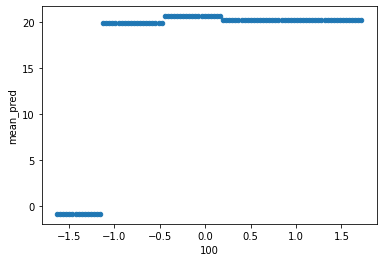

In [164]:
pdp_tree[[100,'mean_pred']].plot.scatter(x=100, y='mean_pred')

In [158]:
pdp_avg = pd.DataFrame()

for i in range(10):
    pdp_avg.loc[i,['x','y']] = pdp_reg.loc[i:i+10,100].mean(), pdp_reg.loc[i:i+10,'mean_pred'].mean()


<AxesSubplot: xlabel='x', ylabel='y'>

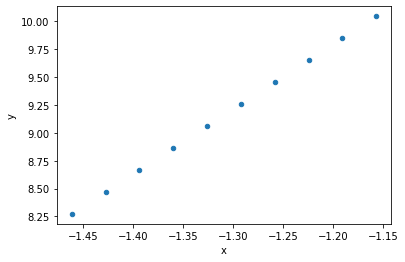

In [159]:
pdp_avg.plot.scatter(x='x', y='y')

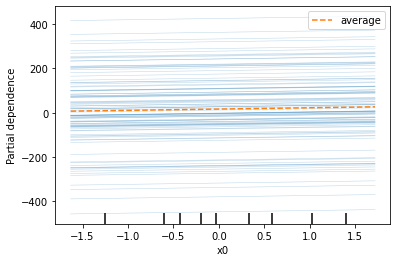

In [146]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(reg, X, [0], kind='both')

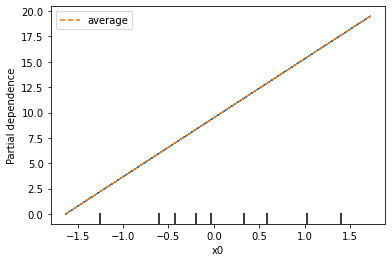

In [171]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(reg, X, [0], kind='both', centered=True)

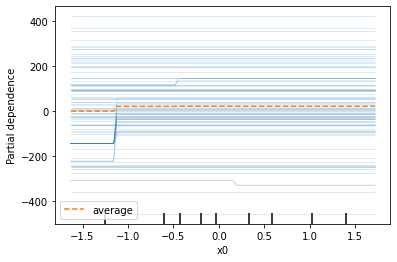

In [170]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(tree, X, [0], kind='both')

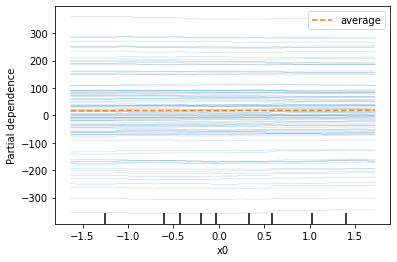

In [176]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(RF, X, [0], kind='both')

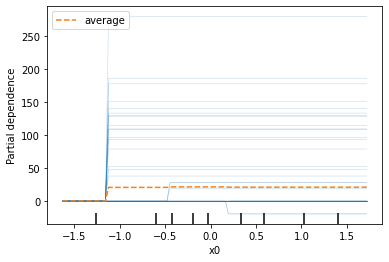

In [169]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(tree, X, [0], kind='both', centered=True)

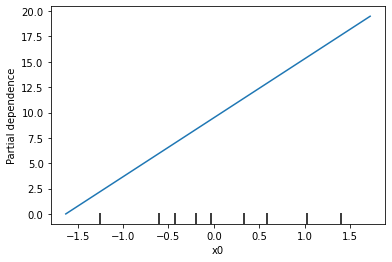

In [180]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(reg, X, [0], centered=True)

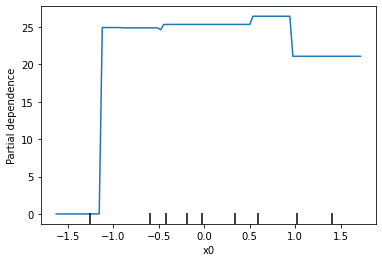

In [181]:
PartialDependenceDisplay.from_estimator(tree, X, [0], centered=True)

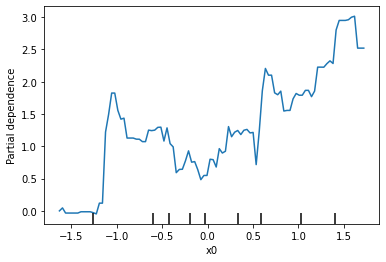

In [182]:
PartialDependenceDisplay.from_estimator(RF, X, [0], centered=True)

In [103]:
from sklearn.inspection import partial_dependence

results = partial_dependence(reg, X, [0])
results["values"]

[array([-1.63045444, -1.59661197, -1.5627695 , -1.52892703, -1.49508457,
        -1.4612421 , -1.42739963, -1.39355716, -1.35971469, -1.32587222,
        -1.29202976, -1.25818729, -1.22434482, -1.19050235, -1.15665988,
        -1.12281741, -1.08897495, -1.05513248, -1.02129001, -0.98744754,
        -0.95360507, -0.9197626 , -0.88592014, -0.85207767, -0.8182352 ,
        -0.78439273, -0.75055026, -0.71670779, -0.68286533, -0.64902286,
        -0.61518039, -0.58133792, -0.54749545, -0.51365299, -0.47981052,
        -0.44596805, -0.41212558, -0.37828311, -0.34444064, -0.31059818,
        -0.27675571, -0.24291324, -0.20907077, -0.1752283 , -0.14138583,
        -0.10754337, -0.0737009 , -0.03985843, -0.00601596,  0.02782651,
         0.06166898,  0.09551144,  0.12935391,  0.16319638,  0.19703885,
         0.23088132,  0.26472379,  0.29856625,  0.33240872,  0.36625119,
         0.40009366,  0.43393613,  0.4677786 ,  0.50162106,  0.53546353,
         0.569306  ,  0.60314847,  0.63699094,  0.6

In [110]:
Xs_sl = results["values"][0]

In [104]:
results["average"]

array([[ 7.28830699,  7.48524798,  7.68218896,  7.87912995,  8.07607094,
         8.27301193,  8.46995292,  8.6668939 ,  8.86383489,  9.06077588,
         9.25771687,  9.45465785,  9.65159884,  9.84853983, 10.04548082,
        10.2424218 , 10.43936279, 10.63630378, 10.83324477, 11.03018576,
        11.22712674, 11.42406773, 11.62100872, 11.81794971, 12.01489069,
        12.21183168, 12.40877267, 12.60571366, 12.80265464, 12.99959563,
        13.19653662, 13.39347761, 13.59041859, 13.78735958, 13.98430057,
        14.18124156, 14.37818255, 14.57512353, 14.77206452, 14.96900551,
        15.1659465 , 15.36288748, 15.55982847, 15.75676946, 15.95371045,
        16.15065143, 16.34759242, 16.54453341, 16.7414744 , 16.93841538,
        17.13535637, 17.33229736, 17.52923835, 17.72617934, 17.92312032,
        18.12006131, 18.3170023 , 18.51394329, 18.71088427, 18.90782526,
        19.10476625, 19.30170724, 19.49864822, 19.69558921, 19.8925302 ,
        20.08947119, 20.28641217, 20.48335316, 20.6

In [183]:
import shap

In [186]:
X100 = shap.utils.sample(X, 100)

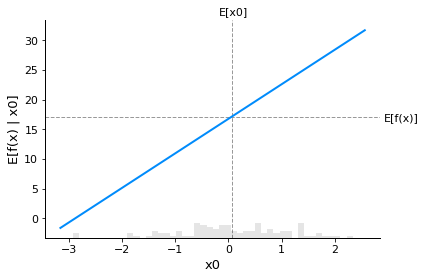

In [187]:
shap.partial_dependence_plot(
    "x0",
    reg.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

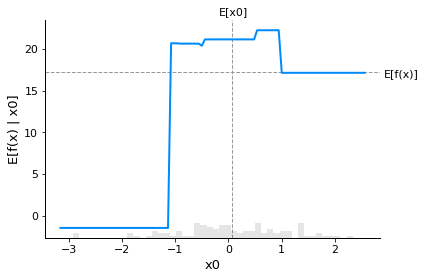

In [193]:
shap.partial_dependence_plot(
    "x0",
    tree.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

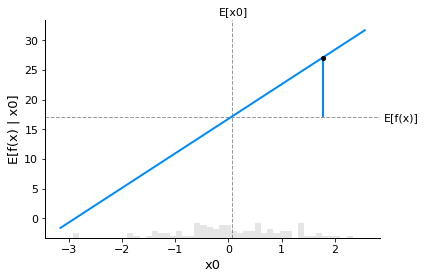

In [189]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(reg.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "x0",
    reg.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

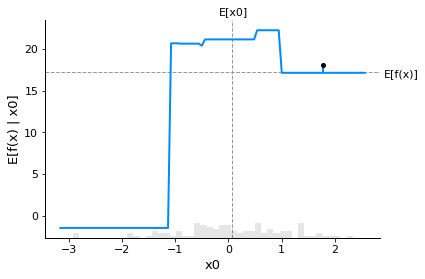

In [197]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(tree.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "x0",
    tree.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

Permutation explainer: 101it [00:19,  2.52it/s]                                                                        


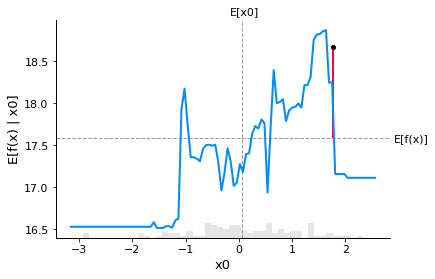

In [199]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(RF.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "x0",
    RF.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

In [192]:
X.loc[20,'x0']

1.772251596669744

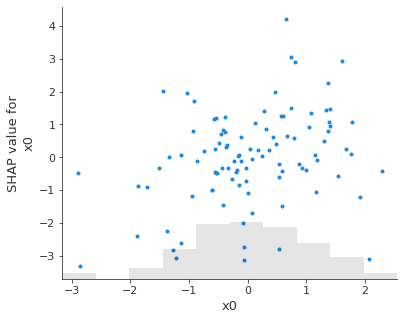

In [200]:
shap.plots.scatter(shap_values[:, "x0"])

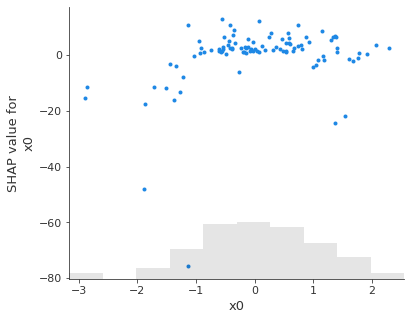

In [198]:
shap.plots.scatter(shap_values[:, "x0"])

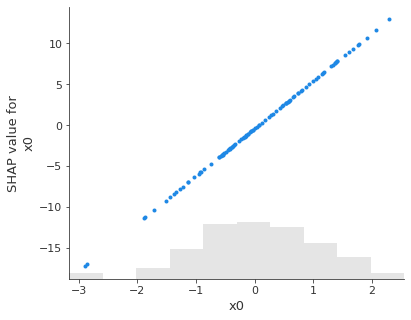

In [190]:
shap.plots.scatter(shap_values[:, "x0"])

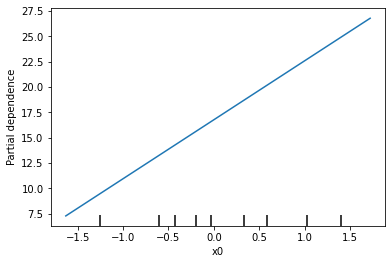

In [191]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(reg, X, [0], centered=False)

In [10]:
ridge = Ridge(random_state=1)
ridge.fit(X, y)
lasso = Lasso()
lasso.fit(X, y)

Lasso()

In [14]:
ridge.score(X, y), lasso.score(X, y), reg.score(X, y)

(0.9971302898112738, 0.996645213197125, 0.9972636382184018)

# Вопрос 3. Из вопроса 2 используйте LinearRegression, Ridge, Lasso, построенные на признаках без нормирования. Сравните полученные коэффициенты.

# Для LinearRegression посчитайте значимость признаков, используя statsmodels. Достаньте истинные значения признаков из make_regression. 

# Для вопросов 5 и 6 формула расчета: 
# d = abs(round(reg.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3)
# if d == np.inf: d=1
# if d == np.nan: d=0
# coefs - истинные коэффициенты.

# 1. Значение коэффициента у константы лучше всего оценила LinearRegression (без проверки значимости) - False
# 2. Lasso правильно занулила все нулевые признаки - False
# 3. Модуль statsmodels для LinearRegression не правильно определил значимость некоторых коэффициентов
# 4. У Ridge и Lasso коэффициенты всегда меньше, чем у LinearRegression 
# 5. LinearRegression точнее всего определила коэффициенты, если посчитать сумму долей абсолютных отклонений от истинного значения - False
# 6. LinearRegression точнее всего определила коэффициенты, если посчитать сумму долей абсолютных отклонений от истинного значения и занулить те коэффициенты, которые незначимо отличаются от нуля по p-value - True


In [16]:
pretty_df = pd.DataFrame(index=['bias']+['x'+str(i) for i in range(20)], columns=['ridge','lasso','OLS','true', \
                                                                        'r-t','l-t','o-t'])

pretty_df.loc['bias'] = round(ridge.intercept_,3), \
                        round(lasso.intercept_,3), \
                        round(reg.intercept_,3), \
                        0, \
                        1, \
                        1, \
                        1

for i in range(20):
    pretty_df.loc['x'+str(i)] = round(ridge.coef_[i],3), round(lasso.coef_[i],3), round(reg.coef_[i],3), round(coefs[i],3), \
                                abs(round(ridge.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3), \
                                abs(round(lasso.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3), \
                                abs(round(reg.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3)
    

<ipython-input-16-d5e75ccc8529>:14: RuntimeWarning: divide by zero encountered in double_scalars
  abs(round(ridge.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3), \
<ipython-input-16-d5e75ccc8529>:15: RuntimeWarning: invalid value encountered in double_scalars
  abs(round(lasso.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3), \
<ipython-input-16-d5e75ccc8529>:16: RuntimeWarning: divide by zero encountered in double_scalars
  abs(round(reg.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3)


In [17]:
pretty_df = pretty_df.fillna(0)
pretty_df = pretty_df.replace([np.inf, -np.inf], 1)
pretty_df

ridge   lasso     OLS    true       r-t       l-t       o-t
bias  -0.046   0.122  -0.254   0.000  0.046000  0.122000  0.254000
x0     5.883   4.456   5.819   6.601  0.108771  0.324951  0.118467
x1    92.684  92.734  93.617  94.769  0.022001  0.021473  0.012156
x2    39.842  39.044  40.451  40.711  0.021346  0.040947  0.006386
x3    -0.074   0.000  -0.137   0.000  1.000000  0.000000  1.000000
x4     0.873   0.000   0.933   0.000  1.000000  0.000000  1.000000
x5    -1.464  -0.000  -1.553   0.000  1.000000  0.000000  1.000000
x6    12.857  11.265  12.999  11.100  0.158288  0.014865  0.171081
x7    94.207  94.295  95.577  95.512  0.013663  0.012742  0.000681
x8    79.903  79.771  81.020  80.824  0.011395  0.013028  0.002425
x9    35.344  34.398  35.276  34.882  0.013245  0.013875  0.011295
x10    1.431   0.000   1.624   0.000  1.000000  0.000000  1.000000
x11    1.315   0.000   1.097   0.000  1.000000  0.000000  1.000000
x12    1.153   0.000   0.976   0.000  1.000000  0.000000  1.000000
x13    0.963   0.000   1.027   0.000  1.000000  0.000000  1.000000
x14   -0.719  -0.000  -0.612   0.000  1.000000  0.000000  1.000000
x15   27.589  27.081  27.966  29.957  0.079047  0.096004  0.066462
x16    7.672   6.335   7.652   7.232  0.060841  0.124032  0.058075
x17    0.609   0.000   0.969   0.000  1.000000  0.000000  1.000000
x18   -0.507  -0.000  -0.193   0.000  1.000000  0.000000  1.000000
x19   53.609  53.060  54.462  52.258  0.025853  0.015347  0.042175

In [18]:
pretty_df.iloc[:,-3:].sum(axis=0)

r-t    10.560449
l-t     0.799265
o-t    10.743204
dtype: float64

In [19]:
pretty_df.loc[['x0', 'x1', 'x2', 'x6', 'x7', 'x8', 'x9', \
       'x15', 'x16', 'x19'], 'o-t'].sum()

0.4892036337455899

In [20]:
# https://habr.com/ru/articles/681218/

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1440.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.06e-92
Time:                        07:18:33   Log-Likelihood:                -360.26
No. Observations:                 100   AIC:                             762.5
Df Residuals:                      79   BIC:                             817.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2543      1.097     -0.232      0.8

# Иксы изменили.

# Вопрос 4. Давайте теперь разберем, как правильно нормировать Х. Изменим немного данные: 
# X['x5'] = X['x5'] + 5
# X['x10'] = X['x10'] + 10
# X['x15'] = X['x15'] + 15
# (Порядковый номер столбца Х с 0)
# Разобьем выборку на train - где мы будем обучать регрессию и test - где мы будем проверять качество регрессии:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# В качестве реализации регрессии возьмем Ridge(random_state=1). Метрика качества R2.
# 1. Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train, дает лучше результат, по сравнению с отсутствием нормировки, причем значительно (во 2-м знаке)
# 2. Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train для X_train, и на X_test для X_test, дает хуже результат, чем StandardScalar, который обучен только на X_train, причем значительно (во 2-м знаке) - True
# 3. Нормирование X_train и X_test с помощью StandardScalar, который обучен на всем X, дает самые лучшие результаты, сравнивая все варианты обучения StandardScalar.

In [21]:
X['x5'] = X['x5'] + 5
X['x10'] = X['x10'] + 10
X['x15'] = X['x15'] + 15

In [22]:
X['x10'].mean()

9.932634057240154

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
clf = Ridge(random_state=1)
clf.fit(X_train, y_train)

Ridge(random_state=1)

In [25]:
clf.score(X_test, y_test)

0.9898256033105497

In [26]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
clf.fit(X_train, y_train)

Ridge(random_state=1)

In [28]:
clf.score(X_test, y_test)

0.9898650249765966

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)

scaler.fit(X_test)

X_test = scaler.transform(X_test)

In [31]:
clf.fit(X_train, y_train)

Ridge(random_state=1)

In [32]:
clf.score(X_test, y_test)

0.9363070374922525

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
scaler.fit(X)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [35]:
clf.fit(X_train, y_train)

Ridge(random_state=1)

In [36]:
clf.score(X_test, y_test)

0.9897361351894082

# Изменим х в тесте

# Вопрос 5. Давайте теперь изменим только X_test (моделируя ситуацию, когда тестовые данные "поплыли"):
# X_test['x5'] = X_test['x5'] - 2
# X_test['x10'] = X_test['x10'] - 5
# X_test['x15'] = X_test['x15'] - 7
# В качестве реализации регрессии продолжаем с Ridge(random_state=1). Метрика качества R2.
# 1. Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train, дает лучше результат, по сравнению с отсутствием нормировки, причем значительно (во 2-м знаке) - True
# 2. Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train для X_train, и на X_test для X_test, дает лучше результат, чем StandardScalar, который обучен только на X_train, причем    значительно (во 2-м знаке) - True
# 3. Нормирование X_train и X_test с помощью StandardScalar, который обучен на всем X,  дает самые лучшие результаты, сравнивая все варианты обучения StandardScalar.
# 4. R2 не может быть меньше 0.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
X_train = pd.DataFrame(X_train, columns=['x'+str(i) for i in range(20)])
X_test = pd.DataFrame(X_test, columns=['x'+str(i) for i in range(20)])

X_test['x5'] = X_test['x5'] - 2
X_test['x10'] = X_test['x10'] - 5
X_test['x15'] = X_test['x15'] - 7

In [39]:
X_test['x5'].mean(), X_train['x5'].mean() 

(3.0794067589563228, 5.16787065231255)

In [40]:
clf = Ridge(random_state=1)
clf.fit(X_train, y_train)

Ridge(random_state=1)

In [41]:
clf.score(X_test, y_test)

-0.7129928780643979

In [42]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
clf.fit(X_train, y_train)

Ridge(random_state=1)

In [44]:
clf.score(X_test, y_test)

-0.7035699739494796

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = pd.DataFrame(X_train, columns=['x'+str(i) for i in range(20)])
X_test = pd.DataFrame(X_test, columns=['x'+str(i) for i in range(20)])

X_test['x5'] = X_test['x5'] - 2
X_test['x10'] = X_test['x10'] - 5
X_test['x15'] = X_test['x15'] - 7

In [46]:
X_test['x5'].mean(), X_train['x5'].mean() 

(3.0794067589563228, 5.16787065231255)

In [47]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)

scaler.fit(X_test)

X_test = scaler.transform(X_test)

In [48]:
clf.fit(X_train, y_train)

Ridge(random_state=1)

In [49]:
clf.score(X_test, y_test)

0.9363070374922525

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = pd.DataFrame(X_train, columns=['x'+str(i) for i in range(20)])
X_test = pd.DataFrame(X_test, columns=['x'+str(i) for i in range(20)])

X_test['x5'] = X_test['x5'] - 2
X_test['x10'] = X_test['x10'] - 5
X_test['x15'] = X_test['x15'] - 7

In [51]:
X_test['x5'].mean(), X_train['x5'].mean() 

(3.0794067589563228, 5.16787065231255)

In [52]:
scaler.fit(pd.concat([X_train,X_test], axis=0))

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [53]:
clf.fit(X_train, y_train)

Ridge(random_state=1)

In [54]:
clf.score(X_test, y_test)

-0.35362342759632637

# Изменим х в трейн, тесте

# Вопрос 6. 

# Давайте теперь изменим и первоначальные X_test и X_train:
# X_train['x5'] = X_train['x5'] * 2.5 
# X_train['x10'] = X_train['x10'] * 5.5
# X_train['x15'] = X_train['x15'] * 7.7

# X_test['x5'] = X_test['x5'] * 2 + 0.5
# X_test['x10'] = X_test['x10'] * 5 + 1
# X_test['x15'] = X_test['x15'] * 7 + 1.5

# В качестве реализации регрессии продолжаем с Ridge(random_state=1). Метрика качества R2.

# 1. Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train, дает лучше результат, по сравнению с отсутствием нормировки, причем значительно (во 2-м знаке)
# 2. Нормирование X_train и X_test с помощью StandardScalar, который обучен на X_train для X_train, и на X_test для X_test, дает хуже результат, чем StandardScalar, который обучен только на X_train, причем значительно (в 2-м знаке) - True
# 3. Нормирование X_train и X_test с помощью StandardScalar, который обучен на всем X,  дает самые лучшие результаты, сравнивая все варианты обучения StandardScalar - True

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [56]:
X_train = pd.DataFrame(X_train, columns=['x'+str(i) for i in range(20)])
X_test = pd.DataFrame(X_test, columns=['x'+str(i) for i in range(20)])

X_train['x5'] = X_train['x5'] * 2.5 
X_train['x10'] = X_train['x10'] * 5.5
X_train['x15'] = X_train['x15'] * 7.7

X_test['x5'] = X_test['x5'] * 2 + 0.5
X_test['x10'] = X_test['x10'] * 5 + 1
X_test['x15'] = X_test['x15'] * 7 + 1.5

In [57]:
X_test['x5'].mean(), X_train['x5'].mean() 

(10.658813517912646, 12.919676630781378)

In [58]:
clf = Ridge(random_state=1)
clf.fit(X_train, y_train)

Ridge(random_state=1)

In [59]:
clf.score(X_test, y_test)

0.9602611364043493

In [60]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
clf.fit(X_train, y_train)

Ridge(random_state=1)

In [62]:
clf.score(X_test, y_test)

0.9604747497307871

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = pd.DataFrame(X_train, columns=['x'+str(i) for i in range(20)])
X_test = pd.DataFrame(X_test, columns=['x'+str(i) for i in range(20)])

X_train['x5'] = X_train['x5'] * 2.5 
X_train['x10'] = X_train['x10'] * 5.5
X_train['x15'] = X_train['x15'] * 7.7

X_test['x5'] = X_test['x5'] * 2 + 0.5
X_test['x10'] = X_test['x10'] * 5 + 1
X_test['x15'] = X_test['x15'] * 7 + 1.5

In [64]:
X_test['x5'].mean(), X_train['x5'].mean() 

(10.658813517912646, 12.919676630781378)

In [65]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)

scaler.fit(X_test)

X_test = scaler.transform(X_test)

In [66]:
clf.fit(X_train, y_train)

Ridge(random_state=1)

In [67]:
clf.score(X_test, y_test)

0.9363070374922525

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = pd.DataFrame(X_train, columns=['x'+str(i) for i in range(20)])
X_test = pd.DataFrame(X_test, columns=['x'+str(i) for i in range(20)])

X_train['x5'] = X_train['x5'] * 2.5 
X_train['x10'] = X_train['x10'] * 5.5
X_train['x15'] = X_train['x15'] * 7.7

X_test['x5'] = X_test['x5'] * 2 + 0.5
X_test['x10'] = X_test['x10'] * 5 + 1
X_test['x15'] = X_test['x15'] * 7 + 1.5

In [69]:
X_test['x5'].mean(), X_train['x5'].mean() 

(10.658813517912646, 12.919676630781378)

In [70]:
scaler.fit(pd.concat([X_train,X_test], axis=0))

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [71]:
clf.fit(X_train, y_train)

Ridge(random_state=1)

In [72]:
clf.score(X_test, y_test)

0.9610493859030464

# Вопрос 7. Работаем с датасетом, определенном в вопросе 4 (где 5й,10й,15й признаки увеличены). Разобъем на трейн и тест как в вопросе 4. Используем нормализованные признаки и Ridge(random_state=1): 

# Теперь давайте сделаем пропущенные значения для важного признака: 
# X_train.loc[X_train['x1'].isin(X_train['x1'].sample(smpl, random_state=1+exp)), 'x1'] = np.nan, где попробуем 5 вариантов случайности exp = range(5). smpl - кол-во пропущенных значений. Ответьте на вопросы 1-2.

# Потом сделаем пропущенные значения только для неважного признака: 
# X_train.loc[X_train['x10'].isin(X_train['x10'].sample(smpl, random_state=1+exp)), 'x10'] = np.nan, где попробуем 5 вариантов
# случайности exp = range(5). Ответьте на вопросы 3-4.

# 1. При 0-60% пропущенных значений, заполнение средним по x1 работает лучше для важного признака, чем отбрасывание наблюдений с пропущенными значениями

# 2. Для 70-90% пропущенных значений, заполнение средним по x1 работает лучше для важного признака, чем отбрасывание наблюдений с пропущенными значениями - True

# 3. При 0-60% пропущенных значений, заполнение средним по x10 работает _в среднем_ лучше для неважного признака, чем отбрасывание наблюдений с пропущенными значениями - True

# 4. Для 70-90% пропущенных значений, заполнение средним по x10 работает лучше для неважного признака, чем отбрасывание наблюдений с пропущенными значениями - True



In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
X_train = pd.DataFrame(X_train, columns=['x'+str(i) for i in range(20)])
X_test = pd.DataFrame(X_test, columns=['x'+str(i) for i in range(20)])

In [75]:
print(X_test['x5'].agg(['mean','std']))
print(X_train['x5'].agg(['mean','std']))

mean    5.079407
std     0.903621
Name: x5, dtype: float64
mean    5.167871
std     0.938719
Name: x5, dtype: float64


In [84]:


df_list = []

for exp in range(5):
    
    print('exp', exp)
    
    df_to_plot = pd.DataFrame()
    
    for smpl in range(0,67):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        X_train = pd.DataFrame(X_train, columns=['x'+str(i) for i in range(20)])
        X_test = pd.DataFrame(X_test, columns=['x'+str(i) for i in range(20)])

        X_train2 = X_train.copy()
        y_train2 = y_train.copy()

#        X_train.loc[X_train['x1'].isin(X_train['x1'].sample(smpl, random_state=1+exp)), 'x1'] = np.nan
        X_train.loc[X_train['x10'].isin(X_train['x10'].sample(smpl, random_state=2+exp)), 'x10'] = np.nan
#        X_train.loc[X_train['x15'].isin(X_train['x15'].sample(smpl, random_state=3+exp)), 'x15'] = np.nan

        y_train.loc[X_train.loc[X_train['x1'].isnull() | X_train['x10'].isnull() | X_train['x15'].isnull()].index] = np.nan

#        X_train2.loc[X_train['x1'].isnull(), 'x1'] = X_train['x1'].mean()
        X_train2.loc[X_train['x10'].isnull(), 'x10'] = X_train['x10'].mean()
#        X_train2.loc[X_train['x15'].isnull(), 'x15'] = X_train['x15'].mean()

        X_train.dropna(inplace=True)
        y_train.dropna(inplace=True)

        if X_train.shape[0] == 0:
            break

        pct_nan = round((1 - (X_train.shape[0] / 67))*100)

#        print(X_train.shape[0], pct_nan, '%')

        scaler.fit(X_train)
        X_train_p = scaler.transform(X_train)
        X_test_p = scaler.transform(X_test)

        scaler.fit(X_train2)
        X_train_p2 = scaler.transform(X_train2)
        X_test_p2 = scaler.transform(X_test)

        clf.fit(X_train_p, y_train)

#        print(smpl)

        missing_dropped = clf.score(X_test_p, y_test)

        missing_dropped = 0 if missing_dropped < 0 else missing_dropped

#        print('missing dropped', missing_dropped)

        clf.fit(X_train_p2, y_train2)

        missing_mean = clf.score(X_test_p2, y_test)
        
        missing_mean = 0 if missing_mean < 0 else missing_mean

#        print('missing replaced by mean', missing_mean)

        df_to_plot.loc[smpl, ['pct_nan'+str(exp), 'missing_mean'+str(exp), 'missing_dropped'+str(exp)]] = \
                            pct_nan, missing_mean, missing_dropped
        
        

#        print('====================')

    df_list.append(df_to_plot)
    

exp 0
exp 1
exp 2
exp 3
exp 4


In [85]:
multi_df = pd.concat(df_list, axis=1)

In [86]:
multi_df

pct_nan0  missing_mean0  missing_dropped0  pct_nan1  missing_mean1  \
0        0.0       0.989865          0.989865       0.0       0.989865   
1        1.0       0.989877          0.989817       1.0       0.989877   
2        3.0       0.989838          0.989565       3.0       0.989871   
3        4.0       0.989838          0.989546       4.0       0.989883   
4        6.0       0.989839          0.989573       6.0       0.989884   
..       ...            ...               ...       ...            ...   
62      93.0       0.990709          0.000000      93.0       0.989889   
63      94.0       0.990069          0.000000      94.0       0.989841   
64      96.0       0.989865          0.000000      96.0       0.989904   
65      97.0       0.971851          0.000000      97.0       0.988162   
66      99.0       0.989906          0.000000      99.0       0.989906   

    missing_dropped1  pct_nan2  missing_mean2  missing_dropped2  pct_nan3  \
0           0.989865       0.0       0.989865          0.989865       0.0   
1           0.989834       1.0       0.989781          0.989366       1.0   
2           0.989908       3.0       0.989786          0.989439       3.0   
3           0.989834       4.0       0.989805          0.989648       4.0   
4           0.989812       6.0       0.990012          0.989228       6.0   
..               ...       ...            ...               ...       ...   
62          0.000000      93.0       0.988260          0.110436      93.0   
63          0.248485      94.0       0.984913          0.000000      94.0   
64          0.000000      96.0       0.982359          0.000000      96.0   
65          0.000000      97.0       0.969722          0.000000      97.0   
66          0.000000      99.0       0.989906          0.000000      99.0   

    missing_mean3  missing_dropped3  pct_nan4  missing_mean4  missing_dropped4  
0        0.989865          0.989865       0.0       0.989865          0.989865  
1        0.989872          0.990144       1.0       0.989888          0.990375  
2        0.989854          0.990022       3.0       0.989824          0.990612  
3        0.989854          0.990168       4.0       0.989826          0.990612  
4        0.989861          0.990270       6.0       0.989911          0.991079  
..            ...               ...       ...            ...               ...  
62       0.983953          0.297988      93.0       0.987520          0.010875  
63       0.982712          0.183098      94.0       0.987306          0.000000  
64       0.937426          0.000000      96.0       0.988984          0.000000  
65       0.946179          0.000000      97.0       0.989583          0.000000  
66       0.989906          0.000000      99.0       0.989906          0.000000  

[67 rows x 15 columns]

In [87]:
multi_df['missing_mean_avg'] = (multi_df['missing_mean0'] + multi_df['missing_mean1'] + multi_df['missing_mean2'] + \
                                multi_df['missing_mean3'] + multi_df['missing_mean4']) / 5

multi_df['missing_dropped_avg'] = (multi_df['missing_dropped0'] + multi_df['missing_dropped1'] + multi_df['missing_dropped2'] + \
                                multi_df['missing_dropped3'] + multi_df['missing_dropped4']) / 5

<AxesSubplot: xlabel='pct_nan0'>

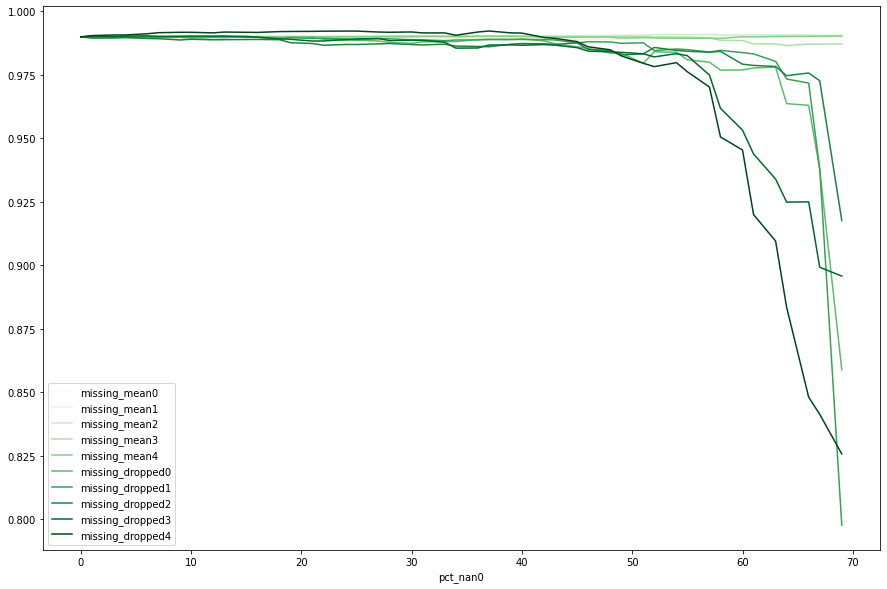

In [88]:
multi_df.loc[multi_df['pct_nan0']<70, \
           ['pct_nan0',
           'missing_mean0', 
           'missing_mean1', 
           'missing_mean2', 
           'missing_mean3', 
           'missing_mean4', 
            'missing_dropped0',
            'missing_dropped1',
            'missing_dropped2',
            'missing_dropped3',
            'missing_dropped4']
            ].set_index('pct_nan0').plot(figsize=(15,10), colormap="Greens")

<AxesSubplot: xlabel='pct_nan0'>

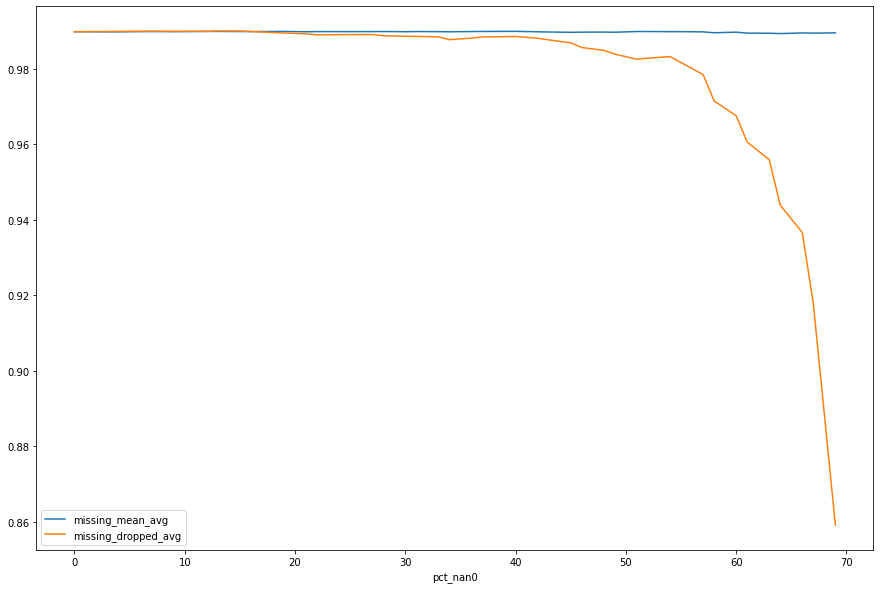

In [89]:
multi_df.loc[multi_df['pct_nan0']<70, \
           ['pct_nan0', 'missing_mean_avg', 'missing_dropped_avg'\
           ]].set_index('pct_nan0').plot(figsize=(15,10))

<AxesSubplot: xlabel='pct_nan0'>

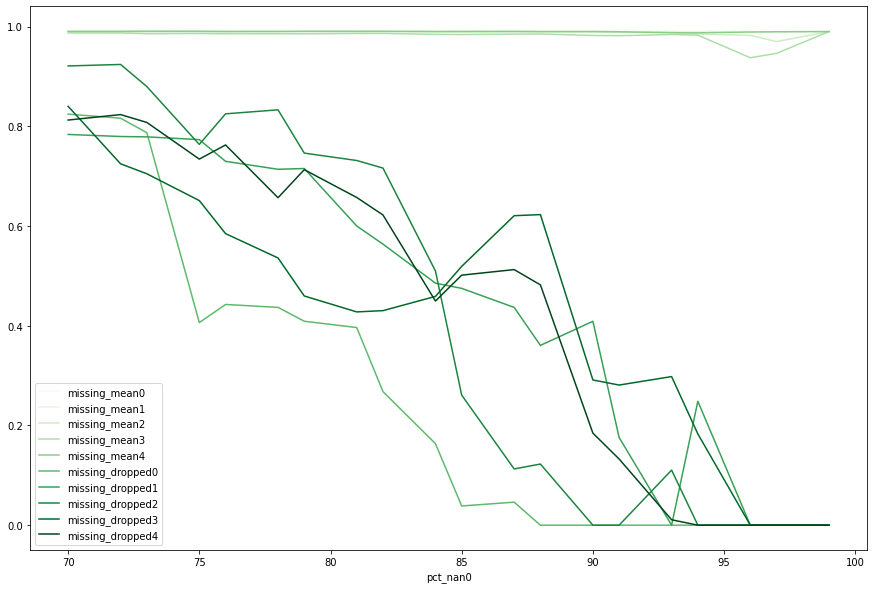

In [90]:
multi_df.loc[multi_df['pct_nan0']>=70, \
           ['pct_nan0',
           'missing_mean0', 
           'missing_mean1', 
           'missing_mean2', 
           'missing_mean3', 
           'missing_mean4', 
            'missing_dropped0',
            'missing_dropped1',
            'missing_dropped2',
            'missing_dropped3',
            'missing_dropped4']
            ].set_index('pct_nan0').plot(figsize=(15,10), colormap="Greens")

<AxesSubplot: xlabel='pct_nan0'>

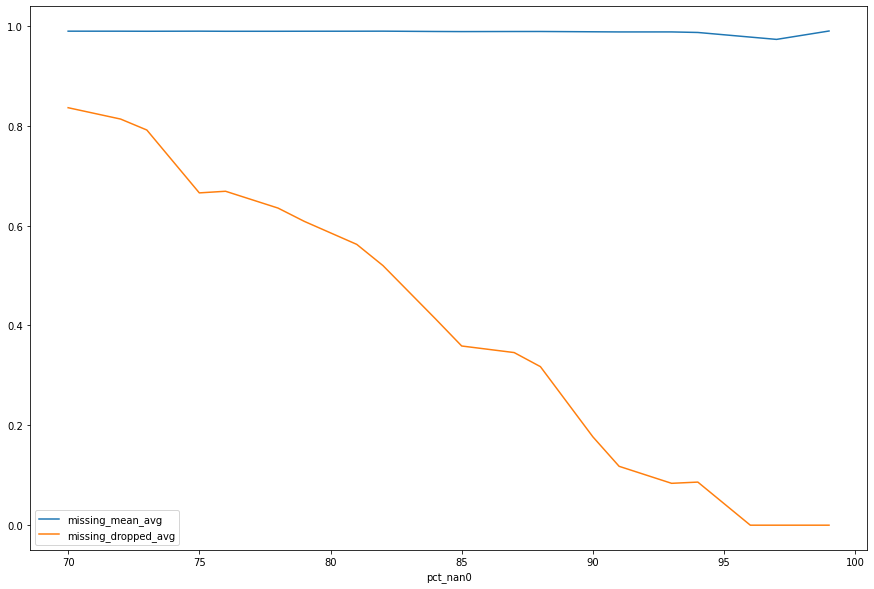

In [91]:
multi_df.loc[multi_df['pct_nan0']>=70, \
           ['pct_nan0', 'missing_mean_avg', 'missing_dropped_avg'\
           ]].set_index('pct_nan0').plot(figsize=(15,10))

# Вопрос 8.

## Вопросы 4-6 были про правильное нормирование.
## Вопрос 7 был про заполнение пропусков.

## Подведем итоги экспериментов. Какие выводы можно сделать?

## 1. Лучше всегда нормировать при применении регуляризации - True
## 2. Если мы предполагаем, что распределение X_test (данные, на которых мы будем применять модель) могут измениться, то лучше отдельно обучать и применять StandardScalar для train и отдельно обучать и применять для test - True
## 3. Заполнение пропусков средним работает всегда.
## 4. Если признак важный, и доля пропущенных значений невелика, то лучше наблюдения с пропущенными значениями просто отбросить - True


# Вопрос 9. Создадим данные, используя 
## X, y, coefs = make_regression(n_samples=1000, n_features=200, noise=10, random_state=42, coef=True)
 
## Давайте построим Ridge(random_state=1), Lasso, LinearRegression на ненормированных данных (т.к. сырые данные близки к нормализованным) и на 100 случайно выбранных наблюдениях. Качество оценим по mean_squared_error на наблюдениях, которые не участвовали в обучении (900).

## 1. Самая лучшая регрессия - LinearRegression 
## 2. Самая лучшая регрессия - Ridge
## 3. Самая лучшая регрессия - Lasso - True 
## 4. Самые близкие к истинным значения коэффициентов у Linear Regression, если оценить по методу вопроса 3
## 5. Самые близкие к истинным значения коэффициентов у Lasso, если оценить по методу вопроса 3 - True
## 6. При количестве наблюдений меньше, чем количество признаков, Lasso может помочь - True
## 7. Регрессию можно использовать при любом соотношении количества признаков и наблюдений


In [119]:
X_full, y_full, coefs = make_regression(n_samples=1000, n_features=200, noise=10, random_state=42, coef=True)

In [120]:
coefs

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       48.36727507,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 24.58866925,  0.        ,  0.        ,  0.  

In [121]:
X_full = pd.DataFrame(X_full, columns=['x'+str(i) for i in range(200)])

print(X_full.agg(['mean','std']))

            x0        x1        x2        x3        x4        x5        x6  \
mean -0.030212 -0.031911  0.039058  0.027166 -0.037715  0.003649  0.085039   
std   0.994708  1.009703  1.012276  0.992165  0.989250  0.996280  1.000155   

            x7        x8        x9  ...     x190      x191      x192  \
mean -0.036188  0.010607 -0.079828  ...  0.05140  0.019492  0.005137   
std   1.006090  0.978190  0.996357  ...  1.02225  1.036729  1.007655   

          x193      x194      x195      x196      x197      x198      x199  
mean  0.078263  0.009038  0.025320 -0.018548  0.009205  0.003809  0.073430  
std   1.002829  1.009883  0.970857  0.987198  1.032557  1.015985  1.014077  

[2 rows x 200 columns]


In [122]:
y_full = pd.DataFrame(y_full)
y_full.agg(['mean','std'])

0
mean   -1.026059
std   194.552954

In [123]:
y_full = y_full[0]

In [125]:
X_index = X_full.sample(100).index

X = X_full.loc[X_index]
y = y_full.loc[X_index]

In [133]:
reg = LinearRegression().fit(X, y)
print('R2', reg.score(X, y))
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(10)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(10,20)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(20,30)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(30,40)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(40,50)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(50,60)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(60,70)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(70,80)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(80,90)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(90,100)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(100,110)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(110,120)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(120,130)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(130,140)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(140,150)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(150,160)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(160,170)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(170,180)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(180,190)])
# print('coef', [str(round(reg.coef_[i], 3)) for i in range(190,200)])
# print('bias', reg.intercept_)

R2 1.0


In [127]:
ridge = Ridge(random_state=1)
ridge.fit(X, y)
lasso = Lasso()
lasso.fit(X, y)

Lasso()

In [128]:
mean_squared_error(y, ridge.predict(X)), mean_squared_error(y, lasso.predict(X)), mean_squared_error(y, reg.predict(X))

(2.0133386357165532, 59.13119001103065, 1.9578282056216168e-25)

In [129]:
ridge.score(X, y), lasso.score(X, y), reg.score(X, y)

(0.999932957609632, 0.9980309838328643, 1.0)

In [131]:
X_test = X_full.loc[~X_full.index.isin(X_index)]
y_test = y_full.loc[~X_full.index.isin(X_index)]

In [132]:
mean_squared_error(y_full, ridge.predict(X_full)), mean_squared_error(y_test, lasso.predict(X_test)), \
mean_squared_error(y_test, reg.predict(X_test))

(20557.05973257059, 140.1310481075359, 22897.625900296305)

In [644]:
# scaler = StandardScaler()

# scaler.fit(X)

# X2 = scaler.transform(X)

In [645]:
# ridge = Ridge()
# ridge.fit(X2, y)
# lasso = Lasso()
# lasso.fit(X2, y)
# reg2 = LinearRegression()
# reg2.fit(X2, y)

In [646]:
# ridge.score(X2, y), lasso.score(X2, y), reg2.score(X, y), reg.score(X, y)

In [134]:
pretty_df = pd.DataFrame(index=['bias']+['x'+str(i) for i in range(200)], columns=['ridge','lasso','OLS','true', \
                                                                        'r-t','l-t','o-t'])

pretty_df.loc['bias'] = round(ridge.intercept_,3), \
                        round(lasso.intercept_,3), \
                        round(reg.intercept_,3), \
                        0, \
                        1, \
                        1, \
                        1

for i in range(200):
    pretty_df.loc['x'+str(i)] = round(ridge.coef_[i],3), round(lasso.coef_[i],3), round(reg.coef_[i],3), round(coefs[i],3), \
                                abs(round(ridge.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3), \
                                abs(round(lasso.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3), \
                                abs(round(reg.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3)
 

<ipython-input-134-02f5618cc347>:14: RuntimeWarning: divide by zero encountered in double_scalars
  abs(round(ridge.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3), \
<ipython-input-134-02f5618cc347>:15: RuntimeWarning: invalid value encountered in double_scalars
  abs(round(lasso.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3), \
<ipython-input-134-02f5618cc347>:16: RuntimeWarning: divide by zero encountered in double_scalars
  abs(round(reg.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3)
<ipython-input-134-02f5618cc347>:15: RuntimeWarning: divide by zero encountered in double_scalars
  abs(round(lasso.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3), \


In [135]:
pretty_df = pretty_df.fillna(0)
pretty_df = pretty_df.replace([np.inf, -np.inf], 1)

with pd.option_context("display.max_rows", 1000):
    display(pretty_df)

ridge   lasso     OLS    true        r-t       l-t        o-t
bias -12.059  -1.062 -12.167   0.000  12.059000  1.062000  12.167000
x0    -3.310  -0.000  -3.115   0.000   1.000000  0.000000   1.000000
x1    11.545   0.216  11.672   0.000   1.000000  1.000000   1.000000
x2    -1.439  -0.000  -1.428   0.000   1.000000  0.000000   1.000000
x3    -0.650   0.000  -0.595   0.000   1.000000  0.000000   1.000000
x4    -8.841  -0.000  -8.904   0.000   1.000000  0.000000   1.000000
x5     3.541   0.000   3.664   0.000   1.000000  0.000000   1.000000
x6    -6.473   1.184  -6.584   0.000   1.000000  1.000000   1.000000
x7    -1.078  -0.566  -1.174   0.000   1.000000  1.000000   1.000000
x8     0.795   0.000   0.670   0.000   1.000000  0.000000   1.000000
x9    -1.794   0.000  -1.798   0.000   1.000000  0.000000   1.000000
x10   12.181   0.000  12.068   0.000   1.000000  0.000000   1.000000
x11    3.369   0.000   3.238   0.000   1.000000  0.000000   1.000000
x12    6.196   0.000   5.991   0.000   1.000000  0.000000   1.000000
x13    1.719  -0.000   1.852   0.000   1.000000  0.000000   1.000000
x14   -4.045  -0.000  -4.023   0.000   1.000000  0.000000   1.000000
x15    4.665   0.000   4.762   0.000   1.000000  0.000000   1.000000
x16    4.895  -0.000   4.998   0.000   1.000000  0.000000   1.000000
x17   -6.964  -1.321  -6.959   0.000   1.000000  1.000000   1.000000
x18    3.325   0.000   3.284   0.000   1.000000  0.000000   1.000000
x19    8.986   0.000   8.884   0.000   1.000000  0.000000   1.000000
x20   -1.392  -0.000  -1.617   0.000   1.000000  0.000000   1.000000
x21    9.012   0.000   9.101   0.000   1.000000  0.000000   1.000000
x22    9.237   0.000   9.085   0.000   1.000000  0.000000   1.000000
x23   -7.414  -0.000  -7.484   0.000   1.000000  0.000000   1.000000
x24    5.292   0.000   5.677   0.000   1.000000  0.000000   1.000000
x25   24.923  47.524  25.189  48.367   0.484711  0.017429   0.479211
x26    6.301   1.454   6.388   0.000   1.000000  1.000000   1.000000
x27    9.674   0.000   9.964   0.000   1.000000  0.000000   1.000000
x28   -0.752   0.229  -0.521   0.000   1.000000  1.000000   1.000000
x29   -2.120  -0.000  -2.145   0.000   1.000000  0.000000   1.000000
x30   17.704  -0.000  18.145   0.000   1.000000  0.000000   1.000000
x31   -0.042   0.000  -0.162   0.000   1.000000  0.000000   1.000000
x32   -6.594  -0.000  -6.550   0.000   1.000000  0.000000   1.000000
x33   -5.822  -0.000  -6.061   0.000   1.000000  0.000000   1.000000
x34   10.712   0.000  10.838   0.000   1.000000  0.000000   1.000000
x35    6.042   0.000   6.145   0.000   1.000000  0.000000   1.000000
x36   -4.120  -0.000  -4.067   0.000   1.000000  0.000000   1.000000
x37   -3.658   0.000  -3.669   0.000   1.000000  0.000000   1.000000
x38    8.530  -0.000   8.579   0.000   1.000000  0.000000   1.000000
x39   -0.978  -0.000  -0.770   0.000   1.000000  0.000000   1.000000
x40    9.407   0.000   9.623   0.000   1.000000  0.000000   1.000000
x41  -21.179  -0.000 -21.659   0.000   1.000000  0.000000   1.000000
x42    4.884  -0.000   5.124   0.000   1.000000  0.000000   1.000000
x43    4.849  -0.000   4.713   0.000   1.000000  0.000000   1.000000
x44  -19.598  -0.026 -19.814   0.000   1.000000  1.000000   1.000000
x45    5.903   0.197   5.900   0.000   1.000000  1.000000   1.000000
x46    3.266   0.179   3.109   0.000   1.000000  1.000000   1.000000
x47    1.351  -0.000   1.438   0.000   1.000000  0.000000   1.000000
x48    0.532  -0.000   0.456   0.000   1.000000  0.000000   1.000000
x49   -0.783   0.000  -0.843   0.000   1.000000  0.000000   1.000000
x50    9.052   0.000   9.178   0.000   1.000000  0.000000   1.000000
x51    0.737   0.000   0.789   0.000   1.000000  0.000000   1.000000
x52    7.012   0.000   7.006   0.000   1.000000  0.000000   1.000000
x53   -4.687  -0.000  -4.542   0.000   1.000000  0.000000   1.000000
x54   -1.120  -0.000  -0.840   0.000   1.000000  0.000000   1.000000
x55   -2.825  -0.000  -2.764   0.000   1.000000  0.000000   1.000000
x56  

In [136]:
pretty_df.iloc[:,-3:].sum(axis=0)

r-t    207.454643
l-t     31.422737
o-t    207.521978
dtype: float64

In [137]:
# https://habr.com/ru/articles/681218/

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 21 Sep 2023   Prob (F-statistic):                nan
Time:                        08:29:36   Log-Likelihood:                 2718.2
No. Observations:                 100   AIC:                            -5236.
Df Residuals:                       0   BIC:                            -4976.
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8416        inf         -0        n

C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\komarov\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


# Вопрос 10. 

# Мультиколинеарность. Вернемся к первоначальным данным: 
# X, y, coefs = make_regression(n_samples=100, n_features=20, noise=10, random_state=42, coef=True)

# Добавим x['x20'] = x['x1'] (столбец, равный первому признаку, если нумерация столбцов с 0).

# Давайте построим Ridge(random_state=1), Lasso, LinearRegression на нормированных данных.

# Ответье на вопросы 1-3.

# Пропуск важной переменной. Вернемся к первоначальным данным: 
# X, y, coefs = make_regression(n_samples=100, n_features=20, noise=10, random_state=42, coef=True)

# Уберем важный x['x1'] (столбец, равный первому признаку, если нумерация столбцов с 0).

# Давайте построим Ridge(random_state=1), Lasso, LinearRegression на нормированных данных.

# Ответье на вопросы 4-6.

# 1. Коэффициенты, кроме тех, которые при x['x20'] и x['x1'], изменились существенно (в среднем более, чем на 10%)
# 2. Lasso занулила коэффициенты для x['x20'] и x['x1']
# 3. Ridge и LinearRegression уменьшила коэффициенты для x['x20'] и x['x1'] примерно в 2 раза, по сравнению с регрессией без x['x20'] - True
# 4. Коэффициенты изменились существенно (в среднем более, чем на 10%) - True
# 5. Lasso занулила все истинно нулевые коэффициенты
# 6. R2 по сравнению с полной регрессией (с x['x1']) упало более, чем на 25% - True  

In [370]:
X, y, coefs = make_regression(n_samples=100, n_features=20, noise=10, random_state=42, coef=True)

In [371]:
coefs

array([ 6.60098441, 94.7688026 , 40.71064891,  0.        ,  0.        ,
        0.        , 11.09980988, 95.51152073, 80.823521  , 34.8820534 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       29.9565678 ,  7.23164753,  0.        ,  0.        , 52.25765993])

In [372]:
X = pd.DataFrame(X, columns=['x'+str(i) for i in range(20)])

In [373]:
y = pd.DataFrame(y)
y = y[0]

In [374]:
reg = LinearRegression().fit(X, y)
print('R2', reg.score(X, y))
print('coef', [str(round(reg.coef_[i], 3)) for i in range(5)])
print('coef', [str(round(reg.coef_[i], 3)) for i in range(5,10)])
print('coef', [str(round(reg.coef_[i], 3)) for i in range(10,15)])
print('coef', [str(round(reg.coef_[i], 3)) for i in range(15,20)])
print('bias', reg.intercept_)

R2 0.9972636382184018
coef ['5.819', '93.617', '40.451', '-0.137', '0.933']
coef ['-1.553', '12.999', '95.577', '81.02', '35.276']
coef ['1.624', '1.097', '0.976', '1.027', '-0.612']
coef ['27.966', '7.652', '0.969', '-0.193', '54.462']
bias -0.25433951244353636


In [375]:
scaler = StandardScaler()

scaler.fit(X)

X2 = scaler.transform(X)

In [376]:
ridge = Ridge(random_state=1)
ridge.fit(X2, y)
lasso = Lasso()
lasso.fit(X2, y)
reg2 = LinearRegression()
reg2.fit(X2, y)

LinearRegression()

In [377]:
# X = X2

In [378]:
ridge.score(X2, y), lasso.score(X2, y), reg.score(X, y), reg2.score(X2, y)

(0.997160531757165, 0.9966621502004029, 0.9972636382184018, 0.9972636382184018)

In [379]:
reg = reg2

In [380]:
pretty_df = pd.DataFrame(index=['bias']+['x'+str(i) for i in range(20)], columns=['ridge','lasso','OLS','true', \
                                                                        'r-t','l-t','o-t'])

pretty_df.loc['bias'] = round(ridge.intercept_,3), \
                        round(lasso.intercept_,3), \
                        round(reg.intercept_,3), \
                        0, \
                        1, \
                        1, \
                        1

for i in range(20):
    pretty_df.loc['x'+str(i)] = round(ridge.coef_[i],3), round(lasso.coef_[i],3), round(reg.coef_[i],3), round(coefs[i],3), \
                                abs(round(ridge.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3), \
                                abs(round(lasso.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3), \
                                abs(round(reg.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3)
    

<ipython-input-380-62ac87fe2bb0>:14: RuntimeWarning: divide by zero encountered in double_scalars
  abs(round(ridge.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3), \
<ipython-input-380-62ac87fe2bb0>:15: RuntimeWarning: invalid value encountered in double_scalars
  abs(round(lasso.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3), \
<ipython-input-380-62ac87fe2bb0>:16: RuntimeWarning: divide by zero encountered in double_scalars
  abs(round(reg.coef_[i],3) - round(coefs[i],3))/round(coefs[i],3)


In [381]:
pretty_df = pretty_df.fillna(0)
pretty_df = pretty_df.replace([np.inf, -np.inf], 1)

with pd.option_context("display.max_rows", 1000):
    display(pretty_df)

ridge   lasso     OLS    true       r-t       l-t       o-t
bias  17.163  17.163  17.163   0.000  1.000000  1.000000  1.000000
x0     5.985   4.505   5.964   6.601  0.093319  0.317528  0.096501
x1    90.190  90.212  91.054  94.769  0.048317  0.048085  0.039201
x2    37.114  36.375  37.576  40.711  0.088354  0.106507  0.077006
x3    -0.071   0.000  -0.122   0.000  1.000000  0.000000  1.000000
x4     0.794   0.000   0.861   0.000  1.000000  0.000000  1.000000
x5    -1.351  -0.000  -1.427   0.000  1.000000  0.000000  1.000000
x6    12.518  10.979  12.657  11.100  0.127748  0.010901  0.140270
x7    88.835  88.857  89.968  95.512  0.069907  0.069677  0.058045
x8    72.115  71.919  72.915  80.824  0.107753  0.110178  0.097855
x9    37.831  36.831  37.869  34.882  0.084542  0.055874  0.085632
x10    1.243   0.000   1.373   0.000  1.000000  0.000000  1.000000
x11    1.301   0.000   1.118   0.000  1.000000  0.000000  1.000000
x12    1.130   0.000   1.015   0.000  1.000000  0.000000  1.000000
x13    1.018   0.000   1.076   0.000  1.000000  0.000000  1.000000
x14   -0.620  -0.000  -0.561   0.000  1.000000  0.000000  1.000000
x15   29.875  29.281  30.291  29.957  0.002737  0.022566  0.011149
x16    8.078   6.610   8.094   7.232  0.116980  0.086007  0.119192
x17    0.772   0.000   1.143   0.000  1.000000  0.000000  1.000000
x18   -0.466  -0.000  -0.194   0.000  1.000000  0.000000  1.000000
x19   47.368  46.874  47.958  52.258  0.093574  0.103027  0.082284

In [382]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1440.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.06e-92
Time:                        10:38:48   Log-Likelihood:                -360.26
No. Observations:                 100   AIC:                             762.5
Df Residuals:                      79   BIC:                             817.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2543      1.097     -0.232      0.8

In [383]:
pretty_df.iloc[:,-3:].sum(axis=0)

r-t    11.833233
l-t     1.930349
o-t    11.807135
dtype: float64

In [384]:
# Мульти-коллинеарность

X['x20'] = X['x1']

In [385]:
newrow = [0]
coefs2 = np.hstack([coefs, newrow])

In [386]:
coefs2

array([ 6.60098441, 94.7688026 , 40.71064891,  0.        ,  0.        ,
        0.        , 11.09980988, 95.51152073, 80.823521  , 34.8820534 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       29.9565678 ,  7.23164753,  0.        ,  0.        , 52.25765993,
        0.        ])

In [387]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1440.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.06e-92
Time:                        10:38:49   Log-Likelihood:                -360.26
No. Observations:                 100   AIC:                             762.5
Df Residuals:                      79   BIC:                             817.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2543      1.097     -0.232      0.8

In [388]:
reg = LinearRegression().fit(X, y)
print('R2', reg.score(X, y))
print('coef', [str(round(reg.coef_[i], 3)) for i in range(5)])
print('coef', [str(round(reg.coef_[i], 3)) for i in range(5,10)])
print('coef', [str(round(reg.coef_[i], 3)) for i in range(10,15)])
print('coef', [str(round(reg.coef_[i], 3)) for i in range(15,21)])
print('bias', reg.intercept_)

R2 0.9972636382184018
coef ['5.819', '46.808', '40.451', '-0.137', '0.933']
coef ['-1.553', '12.999', '95.577', '81.02', '35.276']
coef ['1.624', '1.097', '0.976', '1.027', '-0.612']
coef ['27.966', '7.652', '0.969', '-0.193', '54.462', '46.808']
bias -0.2543395124435648


In [389]:
scaler = StandardScaler()

scaler.fit(X)

X2 = scaler.transform(X)

In [390]:
# X2 = X

In [391]:
ridge = Ridge(random_state=1)
ridge.fit(X2, y)
lasso = Lasso()
lasso.fit(X2, y)
reg2 = LinearRegression()
reg2.fit(X2, y)

LinearRegression()

In [392]:
ridge.score(X2, y), lasso.score(X2, y), reg.score(X, y), reg2.score(X2, y)

(0.9971798968961316,
 0.9966621662346238,
 0.9972636382184018,
 0.9972636382184018)

In [393]:
reg = reg2

In [394]:
pretty_df2 = pd.DataFrame(index=['bias']+['x'+str(i) for i in range(21)], columns=['ridge2','lasso2','OLS2','true2', \
                                                                       'r-t2','l-t2','o-t2'])

pretty_df2.loc['bias'] = round(ridge.intercept_,3), \
                        round(lasso.intercept_,3), \
                        round(reg.intercept_,3), \
                        0, \
                        1, \
                        1, \
                        1

for i in range(21):
    pretty_df2.loc['x'+str(i)] = round(ridge.coef_[i],3), round(lasso.coef_[i],3), round(reg.coef_[i],3), round(coefs2[i],3), \
                                abs(round(ridge.coef_[i],3) - round(coefs2[i],3))/round(coefs2[i],3), \
                                abs(round(lasso.coef_[i],3) - round(coefs2[i],3))/round(coefs2[i],3), \
                                abs(round(reg.coef_[i],3) - round(coefs2[i],3))/round(coefs2[i],3)
    

<ipython-input-394-e6f5713632e5>:14: RuntimeWarning: divide by zero encountered in double_scalars
  abs(round(ridge.coef_[i],3) - round(coefs2[i],3))/round(coefs2[i],3), \
<ipython-input-394-e6f5713632e5>:15: RuntimeWarning: invalid value encountered in double_scalars
  abs(round(lasso.coef_[i],3) - round(coefs2[i],3))/round(coefs2[i],3), \
<ipython-input-394-e6f5713632e5>:16: RuntimeWarning: divide by zero encountered in double_scalars
  abs(round(reg.coef_[i],3) - round(coefs2[i],3))/round(coefs2[i],3)


In [395]:
pretty_df2 = pretty_df2.fillna(0)
pretty_df2 = pretty_df2.replace([np.inf, -np.inf], 1)

with pd.option_context("display.max_rows", 1000):
    display(pd.concat([pretty_df, pretty_df2], axis = 1))

ridge   lasso     OLS    true       r-t       l-t       o-t  ridge2  \
bias  17.163  17.163  17.163   0.000  1.000000  1.000000  1.000000  17.163   
x0     5.985   4.505   5.964   6.601  0.093319  0.317528  0.096501   5.961   
x1    90.190  90.212  91.054  94.769  0.048317  0.048085  0.039201  45.338   
x2    37.114  36.375  37.576  40.711  0.088354  0.106507  0.077006  37.044   
x3    -0.071   0.000  -0.122   0.000  1.000000  0.000000  1.000000  -0.040   
x4     0.794   0.000   0.861   0.000  1.000000  0.000000  1.000000   0.833   
x5    -1.351  -0.000  -1.427   0.000  1.000000  0.000000  1.000000  -1.359   
x6    12.518  10.979  12.657  11.100  0.127748  0.010901  0.140270  12.507   
x7    88.835  88.857  89.968  95.512  0.069907  0.069677  0.058045  88.834   
x8    72.115  71.919  72.915  80.824  0.107753  0.110178  0.097855  72.104   
x9    37.831  36.831  37.869  34.882  0.084542  0.055874  0.085632  37.807   
x10    1.243   0.000   1.373   0.000  1.000000  0.000000  1.000000   1.255   
x11    1.301   0.000   1.118   0.000  1.000000  0.000000  1.000000   1.306   
x12    1.130   0.000   1.015   0.000  1.000000  0.000000  1.000000   1.154   
x13    1.018   0.000   1.076   0.000  1.000000  0.000000  1.000000   0.956   
x14   -0.620  -0.000  -0.561   0.000  1.000000  0.000000  1.000000  -0.552   
x15   29.875  29.281  30.291  29.957  0.002737  0.022566  0.011149  29.869   
x16    8.078   6.610   8.094   7.232  0.116980  0.086007  0.119192   8.085   
x17    0.772   0.000   1.143   0.000  1.000000  0.000000  1.000000   0.831   
x18   -0.466  -0.000  -0.194   0.000  1.000000  0.000000  1.000000  -0.436   
x19   47.368  46.874  47.958  52.258  0.093574  0.103027  0.082284  47.365   
x20      NaN     NaN     NaN     NaN       NaN       NaN       NaN  45.338   

      lasso2    OLS2   true2      r-t2      l-t2      o-t2  
bias  17.163  17.163   0.000  1.000000  1.000000  1.000000  
x0     4.504   5.964   6.601  0.096955  0.317679  0.096501  
x1    90.212  45.527  94.769  0.521595  0.048085  0.519600  
x2    36.376  37.576  40.711  0.090074  0.106482  0.077006  
x3     0.000  -0.122   0.000  1.000000  0.000000  1.000000  
x4     0.000   0.861   0.000  1.000000  0.000000  1.000000  
x5    -0.000  -1.427   0.000  1.000000  0.000000  1.000000  
x6    10.979  12.657  11.100  0.126757  0.010901  0.140270  
x7    88.858  89.968  95.512  0.069918  0.069667  0.058045  
x8    71.919  72.915  80.824  0.107889  0.110178  0.097855  
x9    36.831  37.869  34.882  0.083854  0.055874  0.085632  
x10    0.000   1.373   0.000  1.000000  0.000000  1.000000  
x11    0.000   1.118   0.000  1.000000  0.000000  1.000000  
x12    0.000   1.015   0.000  1.000000  0.000000  1.000000  
x13    0.000   1.076   0.000  1.000000  0.000000  1.000000  
x14   -0.000  -0.561   0.000  1.000000  0.000000  1.000000  
x15   29.281  30.291  29.957  0.002938  0.022566  0.011149  
x16    6.610   8.094   7.232  0.117948  0.086007  0.119192  
x17    0.000   1.143   0.000  1.000000  0.000000  1.000000  
x18   -0.000  -0.194   0.000  1.000000  0.000000  1.000000  
x19   46.875  47.958  52.258  0.093632  0.103008  0.082284  
x20    0.000  45.527   0.000  1.000000  0.000000  1.000000

In [396]:
pretty_df2.iloc[:,-3:].sum(axis=0)

r-t2    13.311558
l-t2     1.930447
o-t2    13.287534
dtype: float64

In [397]:
pretty_df[['r-t','l-t','o-t']].sum(axis=0)

r-t    11.833233
l-t     1.930349
o-t    11.807135
dtype: float64

In [398]:
((pretty_df2['r-t2'] - pretty_df['r-t']) / pretty_df['r-t']).loc[pretty_df['r-t'].index]

bias    0.000000
x0      0.038961
x1      9.795152
x2      0.019461
x3      0.000000
x4      0.000000
x5      0.000000
x6     -0.007757
x7      0.000150
x8      0.001263
x9     -0.008138
x10     0.000000
x11     0.000000
x12     0.000000
x13     0.000000
x14     0.000000
x15     0.073171
x16     0.008274
x17     0.000000
x18     0.000000
x19     0.000613
dtype: float64

In [399]:
((pretty_df2['l-t2'] - pretty_df['l-t']) / pretty_df['l-t']).loc[pretty_df['l-t'].index]

bias    0.000000
x0      0.000477
x1      0.000000
x2     -0.000231
x3           NaN
x4           NaN
x5           NaN
x6      0.000000
x7     -0.000150
x8      0.000000
x9      0.000000
x10          NaN
x11          NaN
x12          NaN
x13          NaN
x14          NaN
x15     0.000000
x16     0.000000
x17          NaN
x18          NaN
x19    -0.000186
dtype: float64

In [400]:
(pretty_df2['o-t2'] - pretty_df['o-t']).loc[pretty_df['o-t'].index]

bias    0.0000
x0      0.0000
x1      0.4804
x2      0.0000
x3      0.0000
x4      0.0000
x5      0.0000
x6      0.0000
x7      0.0000
x8      0.0000
x9      0.0000
x10     0.0000
x11     0.0000
x12     0.0000
x13     0.0000
x14     0.0000
x15     0.0000
x16     0.0000
x17     0.0000
x18     0.0000
x19     0.0000
dtype: float64

# Не добавили важный признак

In [401]:
X.drop(columns=['x20'], inplace=True)

In [402]:
X.drop(columns=['x1'], inplace=True)

In [403]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     11.48
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           9.47e-16
Time:                        10:38:54   Log-Likelihood:                -589.54
No. Observations:                 100   AIC:                             1219.
Df Residuals:                      80   BIC:                             1271.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4144     10.760     -0.782      0.4

In [404]:
reg = LinearRegression().fit(X, y)
print('R2', reg.score(X, y))
print('coef', [str(round(reg.coef_[i], 3)) for i in range(5)])
print('coef', [str(round(reg.coef_[i], 3)) for i in range(5,10)])
print('coef', [str(round(reg.coef_[i], 3)) for i in range(10,15)])
print('coef', [str(round(reg.coef_[i], 3)) for i in range(15,19)])
print('bias', reg.intercept_)

R2 0.7316799496981454
coef ['10.2', '54.857', '-6.781', '-7.295', '0.127']
coef ['15.194', '95.785', '83.404', '39.646', '-0.955']
coef ['0.165', '-3.367', '12.264', '-14.785', '29.152']
coef ['6.301', '-8.555', '-6.01', '55.145']
bias -8.414447368576791


In [405]:
scaler = StandardScaler()

scaler.fit(X)

X2 = scaler.transform(X)

In [406]:
# X2 = X

In [407]:
ridge = Ridge(random_state=1)
ridge.fit(X2, y)
lasso = Lasso()
lasso.fit(X2, y)
reg2 = LinearRegression()
reg2.fit(X2, y)

LinearRegression()

In [408]:
ridge.score(X2, y), lasso.score(X2, y), reg2.score(X2, y), reg.score(X, y)

(0.7315889717903807,
 0.7308833777230123,
 0.7316799496981454,
 0.7316799496981454)

In [409]:
reg = reg2

In [410]:
99-73

26

In [411]:
ridge.coef_.shape

(19,)

In [412]:
pretty_df2 = pd.DataFrame(index=['bias']+['x'+str(i) for i in range(20)], columns=['ridge2','lasso2','OLS2','true2', \
                                                                       'r-t2','l-t2','o-t2'])

pretty_df2.loc['bias'] = round(ridge.intercept_,3), \
                        round(lasso.intercept_,3), \
                        round(reg.intercept_,3), \
                        0, \
                        1, \
                        1, \
                        1


for j in range(20):
    
    i = j
    
    if j == 1:
        pretty_df2.loc['x'+str(j)] = np.nan, np.nan, np.nan, round(coefs2[j],3), 1,1,1
        continue
    
    if j > 1:
        i = j - 1
    
    pretty_df2.loc['x'+str(j)] = round(ridge.coef_[i],3), round(lasso.coef_[i],3), round(reg.coef_[i],3), round(coefs2[j],3), \
                                abs(round(ridge.coef_[i],3) - round(coefs2[j],3))/round(coefs2[j],3), \
                                abs(round(lasso.coef_[i],3) - round(coefs2[j],3))/round(coefs2[j],3), \
                                abs(round(reg.coef_[i],3) - round(coefs2[j],3))/round(coefs2[j],3)
    

<ipython-input-412-f70134ad4d29>:25: RuntimeWarning: divide by zero encountered in double_scalars
  abs(round(ridge.coef_[i],3) - round(coefs2[j],3))/round(coefs2[j],3), \
<ipython-input-412-f70134ad4d29>:26: RuntimeWarning: divide by zero encountered in double_scalars
  abs(round(lasso.coef_[i],3) - round(coefs2[j],3))/round(coefs2[j],3), \
<ipython-input-412-f70134ad4d29>:27: RuntimeWarning: divide by zero encountered in double_scalars
  abs(round(reg.coef_[i],3) - round(coefs2[j],3))/round(coefs2[j],3)
<ipython-input-412-f70134ad4d29>:26: RuntimeWarning: invalid value encountered in double_scalars
  abs(round(lasso.coef_[i],3) - round(coefs2[j],3))/round(coefs2[j],3), \


In [413]:
pretty_df2 = pretty_df2.fillna(0)
pretty_df2 = pretty_df2.replace([np.inf, -np.inf], 1)

with pd.option_context("display.max_rows", 1000):
    display(pd.concat([pretty_df, pretty_df2], axis = 1))

ridge   lasso     OLS    true       r-t       l-t       o-t  ridge2  \
bias  17.163  17.163  17.163   0.000  1.000000  1.000000  1.000000  17.163   
x0     5.985   4.505   5.964   6.601  0.093319  0.317528  0.096501  10.326   
x1    90.190  90.212  91.054  94.769  0.048317  0.048085  0.039201   0.000   
x2    37.114  36.375  37.576  40.711  0.088354  0.106507  0.077006  50.177   
x3    -0.071   0.000  -0.122   0.000  1.000000  0.000000  1.000000  -5.791   
x4     0.794   0.000   0.861   0.000  1.000000  0.000000  1.000000  -6.612   
x5    -1.351  -0.000  -1.427   0.000  1.000000  0.000000  1.000000   0.164   
x6    12.518  10.979  12.657  11.100  0.127748  0.010901  0.140270  14.612   
x7    88.835  88.857  89.968  95.512  0.069907  0.069677  0.058045  89.085   
x8    72.115  71.919  72.915  80.824  0.107753  0.110178  0.097855  74.190   
x9    37.831  36.831  37.869  34.882  0.084542  0.055874  0.085632  42.417   
x10    1.243   0.000   1.373   0.000  1.000000  0.000000  1.000000  -0.894   
x11    1.301   0.000   1.118   0.000  1.000000  0.000000  1.000000   0.335   
x12    1.130   0.000   1.015   0.000  1.000000  0.000000  1.000000  -3.311   
x13    1.018   0.000   1.076   0.000  1.000000  0.000000  1.000000  12.532   
x14   -0.620  -0.000  -0.561   0.000  1.000000  0.000000  1.000000 -13.328   
x15   29.875  29.281  30.291  29.957  0.002737  0.022566  0.011149  31.070   
x16    8.078   6.610   8.094   7.232  0.116980  0.086007  0.119192   6.714   
x17    0.772   0.000   1.143   0.000  1.000000  0.000000  1.000000 -10.207   
x18   -0.466  -0.000  -0.194   0.000  1.000000  0.000000  1.000000  -6.127   
x19   47.368  46.874  47.958  52.258  0.093574  0.103027  0.082284  47.959   

      lasso2    OLS2   true2      r-t2      l-t2      o-t2  
bias  17.163  17.163   0.000  1.000000  1.000000  1.000000  
x0     8.277  10.454   6.601  0.564308  0.253901  0.583699  
x1     0.000   0.000  94.769  1.000000  1.000000  1.000000  
x2    48.837  50.958  40.711  0.232517  0.199602  0.251701  
x3    -3.532  -6.042   0.000  1.000000  1.000000  1.000000  
x4    -4.964  -6.733   0.000  1.000000  1.000000  1.000000  
x5    -0.000   0.117   0.000  1.000000  0.000000  1.000000  
x6    13.462  14.794  11.100  0.316396  0.212793  0.332793  
x7    90.046  90.164  95.512  0.067290  0.057228  0.055993  
x8    73.316  75.061  80.824  0.082080  0.092893  0.071303  
x9    41.760  42.561  34.882  0.216014  0.197179  0.220142  
x10   -0.252  -0.807   0.000  1.000000  1.000000  1.000000  
x11    0.000   0.168   0.000  1.000000  0.000000  1.000000  
x12   -2.497  -3.503   0.000  1.000000  1.000000  1.000000  
x13   11.641  12.849   0.000  1.000000  1.000000  1.000000  
x14  -12.415 -13.558   0.000  1.000000  1.000000  1.000000  
x15   29.690  31.575  29.957  0.037153  0.008913  0.054011  
x16    5.621   6.665   7.232  0.071626  0.222760  0.078402  
x17   -9.236 -10.096   0.000  1.000000  1.000000  1.000000  
x18   -4.053  -6.022   0.000  1.000000  1.000000  1.000000  
x19   47.856  48.559  52.258  0.082265  0.084236  0.070783

In [414]:
pretty_df2.iloc[:,-3:].sum(axis=0)

r-t2    13.669650
l-t2    11.329505
o-t2    13.718827
dtype: float64

In [415]:
pretty_df[['r-t','l-t','o-t']].sum(axis=0)

r-t    11.833233
l-t     1.930349
o-t    11.807135
dtype: float64

In [420]:
((pretty_df2['ridge2'] - pretty_df['ridge']) / pretty_df['ridge']).loc[pretty_df['ridge'].index]

bias     0.000000
x0       0.725313
x1      -1.000000
x2       0.351970
x3      80.563380
x4      -9.327456
x5      -1.121392
x6       0.167279
x7       0.002814
x8       0.028773
x9       0.121223
x10     -1.719228
x11     -0.742506
x12     -3.930088
x13     11.310413
x14     20.496774
x15      0.040000
x16     -0.168854
x17    -14.221503
x18     12.148069
x19      0.012477
dtype: float64

In [421]:
((pretty_df2['lasso2'] - pretty_df['lasso']) / pretty_df['lasso']).loc[pretty_df['lasso'].index]

bias    0.000000
x0      0.837292
x1     -1.000000
x2      0.342598
x3          -inf
x4          -inf
x5           NaN
x6      0.226159
x7      0.013381
x8      0.019425
x9      0.133827
x10         -inf
x11          NaN
x12         -inf
x13          inf
x14          inf
x15     0.013968
x16    -0.149622
x17         -inf
x18          inf
x19     0.020950
dtype: float64

In [422]:
(pretty_df2['OLS2'] - pretty_df['OLS']).loc[pretty_df['OLS'].index]

bias     0.000
x0       4.490
x1     -91.054
x2      13.382
x3      -5.920
x4      -7.594
x5       1.544
x6       2.137
x7       0.196
x8       2.146
x9       4.692
x10     -2.180
x11     -0.950
x12     -4.518
x13     11.773
x14    -12.997
x15      1.284
x16     -1.429
x17    -11.239
x18     -5.828
x19      0.601
dtype: float64